In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
from moviepy.editor import VideoFileClip

def extract_audio(video_file, audio_file):
    # Load the video clip
    video_clip = VideoFileClip(video_file)

    # Extract audio and save it to the output file
    video_clip.audio.write_audiofile(audio_file)

if __name__ == "__main__":
    # Specify the path of the input video file
    input_video_file = '/content/drive/MyDrive/AlitaBattleAngel.mkv'

    # Specify the path for the output audio file
    output_audio_file = '/content/output_audio.wav'

    # Call the function to extract audio
    extract_audio(input_video_file, output_audio_file)

    print(f"Audio extracted and saved to: {output_audio_file}")


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.
Audio extracted and saved to: /content/output_audio.wav


In [11]:
from scipy.io.wavfile import read
import moviepy.editor as mp


audio_file_path = '/content/output_audio.wav'

sample_rate, stereo_data = read(audio_file_path)

n = len(stereo_data)

# Separate the stereo channels
left_channel = stereo_data[:, 0]
right_channel = stereo_data[:, 1]

left_channel_data_rate = sample_rate * left_channel.shape[0] * left_channel.dtype.itemsize
right_channel_data_rate = sample_rate * right_channel.shape[0] * right_channel.dtype.itemsize

print(f"Sample Rate: {sample_rate} Hz")
print(f"Left Channel Data Rate: {left_channel_data_rate} bytes/second")
print(f"Right Channel Data Rate: {right_channel_data_rate} bytes/second")


Sample Rate: 44100 Hz
Left Channel Data Rate: 2334705508800 bytes/second
Right Channel Data Rate: 2334705508800 bytes/second


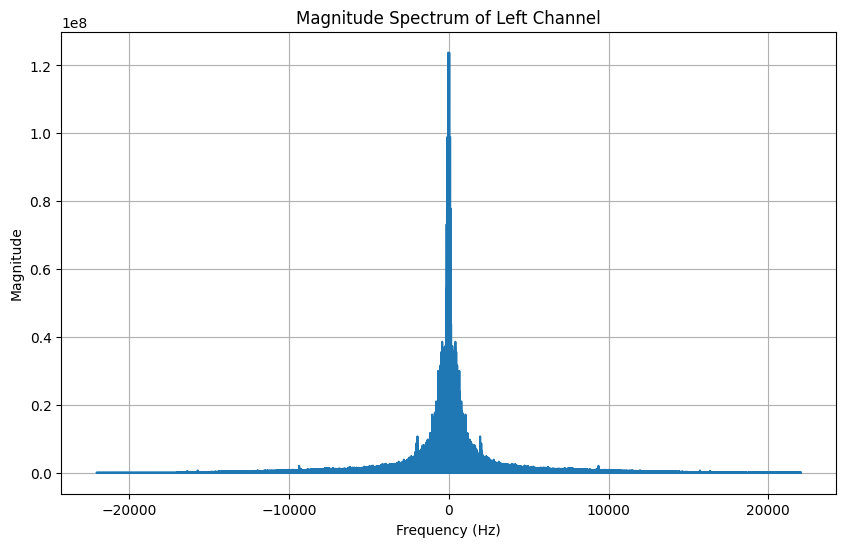

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

fft_result = np.fft.fft(left_channel)
abs_left_Fourier = np.absolute(fft_result[:n//2])

fft_freq = np.fft.fftfreq(len(left_channel), 1 / sample_rate)

magnitude_spectrum = np.abs(fft_result)

plt.figure(figsize=(10, 6))
plt.plot(fft_freq, magnitude_spectrum)
plt.title('Magnitude Spectrum of Left Channel')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


In [29]:
!pip install pydub

import librosa
from sklearn.decomposition import PCA
import soundfile as sf
from pydub import AudioSegment

def extract_audio(input_wav, output_mp3):
    # Read the WAV file
    audio_data, sample_rate = librosa.load(input_wav, mono=True)

    # Write the WAV data to a temporary file
    temp_wav = 'temp.wav'
    sf.write(temp_wav, audio_data, sample_rate)

    # Read the temporary WAV file with pydub
    audio_segment = AudioSegment.from_wav(temp_wav)

    # Export the audio as MP3
    audio_segment.export(output_mp3, format="mp3")

def compress_audio(input_mp3, output_compressed_wav, compression_ratio=0.95):
    # Read the MP3 file
    audio_data, sample_rate = librosa.load(input_mp3, mono=True)

    # Apply PCA
    pca = PCA(n_components=compression_ratio)
    compressed_data = pca.fit_transform(audio_data.reshape(-1, 1))

    # Reconstruct the compressed audio data
    reconstructed_data = pca.inverse_transform(compressed_data).flatten()

    # Write the compressed audio to a new WAV file
    sf.write(output_compressed_wav, reconstructed_data, sample_rate)

if __name__ == "__main__":
    # Specify the path of the input WAV file
    input_wav = '/content/output_audio.wav'

    # Specify the path for the output MP3 file
    output_mp3 = '/content/audio.mp3'

    # Specify the path for the output compressed WAV file
    output_compressed_wav = '/content/compressed_audio_final.wav'

    # Specify the compression ratio
    compression_ratio = 0.95

    # Step 1: Extract Audio and Convert to MP3
    extract_audio(input_wav, output_mp3)

    # Step 2: Compress the Audio
    compress_audio(output_mp3, output_compressed_wav, compression_ratio)

    print(f"Audio extracted and saved as MP3: {output_mp3}")
    print(f"Compressed audio saved as WAV: {output_compressed_wav}")


Audio extracted and saved as MP3: /content/audio.mp3
Compressed audio saved as WAV: /content/compressed_audio_final.wav


In [ ]:
from pydub import AudioSegment

def convert_wav_to_mp3(input_wav, output_mp3):
    # Load the .wav file
    sound = AudioSegment.from_wav(input_wav)

    # Export as .mp3
    sound.export(output_mp3, format="mp3")

# Example usage:
input_wav_file = "/content/output_audio.wav"
output_mp3_file = "/content/original.mp3"

convert_wav_to_mp3(input_wav_file, output_mp3_file)

import numpy as np
from sklearn.decomposition import PCA
from pydub import AudioSegment
import librosa


audio_data, sr = librosa.load(input_mp3_file,sr=None)

audio_data_2d = audio_data.reshape(1,-1)

compression_size = 0.5

pca = PCA(n_components = compression_size)
cr = pca.fit_transform(audio_data_2d)

np.save("com.npy",cr)


input_mp3_file = "/content/original.mp3"


In [ ]:

import soundfile as sf

re_audio_2d = pca.inverse_transform(cr)
re_audio=re_audio_2d.flatten()

sf.write("reconstructed.mp3",re_audio,sr)